### 3.4 주식 비교하기

3.4.1 야후 파이낸스로 주식 시세 구하기

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\anifilm\anaconda3\envs\py38_32\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\Users\anifilm\anaconda3\envs\py38_32\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\anifilm\anaconda3\envs\py38_32\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


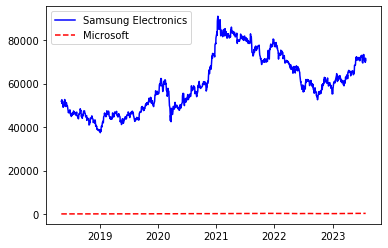

In [2]:
import matplotlib.pyplot as plt

plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

3.4.2 일간 변동률로 주가 비교하기

In [3]:
type(sec['Close'])

pandas.core.series.Series

In [4]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2023-07-24    70400.0
2023-07-25    70000.0
2023-07-26    69800.0
2023-07-27    71700.0
2023-07-28    70600.0
Name: Close, Length: 1289, dtype: float64

In [5]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2023-07-24    70300.0
2023-07-25    70400.0
2023-07-26    70000.0
2023-07-27    69800.0
2023-07-28    71700.0
Name: Close, Length: 1289, dtype: float64

In [6]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [8]:
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

3.4.3 주가 일간 변동률 히스토그램

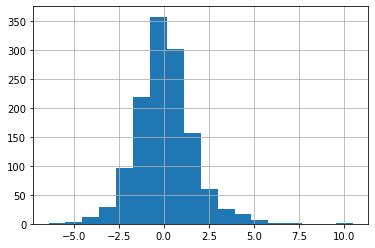

In [9]:
#import matplotlib.pyplot as plt

sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0

plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [10]:
sec_dpc.describe()

count    1289.000000
mean        0.036529
std         1.595179
min        -6.387665
25%        -0.967742
50%         0.000000
75%         0.851582
max        10.470588
Name: Close, dtype: float64

3.4.4 일간 변동률 누적합 구하기

In [11]:
sec_dpc_cs = sec_dpc.cumsum() # 일간 변동률의 누적합을 구한다
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2023-07-24    46.752127
2023-07-25    46.183946
2023-07-26    45.898231
2023-07-27    48.620294
2023-07-28    47.086124
Name: Close, Length: 1289, dtype: float64